### Student Information
Name: 李志軒

Student ID: 112138503

GitHub ID: Jerry112138503

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [40]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
import os 
from pprint import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split, cross_val_score

# 1.First

### The data、data preparation

In [42]:
# categories 有4個分類
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [43]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups
    
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [44]:
#物件裡的屬性(4個類別)
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [1]:
#twenty_train

### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [46]:
twenty_train.data[:3]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

### Data Transformation

Converting Dictionary into Pandas Dataframe

In [47]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [48]:
for t in X["text"][:3]:
    print(t)

From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We would also like to do the same, converting to HPGL (HP plotter) files.  Please email any response.  Is this the correct group?  Thanks in advance.  Michael. --  Michael Collier (Programmer)                 The Computer Unit, Email: M.P.Collier@uk.ac.city                The City University, Tel: 071 477-8000 x3769                      London, Fax: 071 477-8565                            EC1V 0HB. 
From: ani@ms.uky.edu (Aniruddha B. Deglurkar) Subject: help: Splitting a trimming region along a mesh  Organization: University Of Kentucky, Dept. of Math Sciences Lines: 28    	Hi,  	I have a problem, I hope some of the 'gurus' can help me solve.  	Background of the problem: 	I have a rectangular mesh in the uv

### Adding Columns

In [49]:
# add category to the dataframe
X['category'] = twenty_train.target

In [50]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [51]:
X[0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [52]:
X['category_name'].loc[lambda c: c == "comp.graphics"]

0       comp.graphics
1       comp.graphics
11      comp.graphics
14      comp.graphics
15      comp.graphics
            ...      
2232    comp.graphics
2236    comp.graphics
2241    comp.graphics
2242    comp.graphics
2248    comp.graphics
Name: category_name, Length: 584, dtype: object

###  ** >>> Exercise 3 (5 min): **  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [53]:
X.loc[:5,'category']

0    1
1    1
2    3
3    3
4    3
5    3
Name: category, dtype: int64

### Data Mining using Pandas

#### (1)Missing Values

In [54]:
# check missing values
X.isnull()

,text,category,category_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2252,False,False,False
2253,False,False,False
2254,False,False,False
2255,False,False,False


In [55]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [56]:
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [57]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [58]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

Ans : Because the values in columns 2, 3, and 5 are in string format, they will not be detected as empty values.

### 4.2 Dealing with Duplicate Data

In [59]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2252    False
2253    False
2254    False
2255    False
2256    False
Length: 2257, dtype: bool

In [60]:
sum(X.duplicated())

0

In [61]:
sum(X.duplicated('text'))

0

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

Ans : The new X_sample dataframe randomly extracts 1000 rows from the original X dataframe and arranges them in a random order, whereas the original X data is ordered.

### Exercise7~16 look DM2023-Lab1-Master

# 2.Second
(1)The data

Merge 3 files into 1 big dataframe

In [119]:

def read(filename):
    with open(filename, 'r',encoding='utf-8') as f:
        lines = f.readlines()

    data = [line.strip().split('\t') for line in lines]

    df = pd.DataFrame(data, columns=['sentence', 'score'])

    df['score'] = pd.to_numeric(df['score'])

    return df

In [130]:
df_amazon=read('sentiment labelled sentences/amazon_cells_labelled.txt')
df_imdb=read('sentiment labelled sentences/imdb_labelled.txt')
df_yelp=read('sentiment labelled sentences/yelp_labelled.txt')
df = pd.concat([df_amazon, df_imdb, df_yelp], ignore_index=True)
print(f"Number:{len(df)}")
print(f"missing value:{df.isnull().sum()}")
print(f"Duplicate:{df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"After drop the duplicate number:{len(df)}")
df


Number:3000
missing value:sentence    0
score       0
dtype: int64
Duplicate:17
After drop the duplicate number:2983


,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0


(2)Data preparation

In [63]:
df.loc[:10, 'score']

0     0
1     1
2     1
3     0
4     1
5     0
6     0
7     1
8     0
9     0
10    1
Name: score, dtype: int64

In [64]:
df.loc[:10, 'sentence']

0     So there is no way for me to plug it in here i...
1                           Good case, Excellent value.
2                                Great for the jawbone.
3     Tied to charger for conversations lasting more...
4                                     The mic is great.
5     I have to jiggle the plug to get it to line up...
6     If you have several dozen or several hundred c...
7           If you are Razr owner...you must have this!
8                   Needless to say, I wasted my money.
9                      What a waste of money and time!.
10                      And the sound quality is great.
Name: sentence, dtype: object

In [65]:
df.iloc[:10, 0]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: sentence, dtype: object

## 3.Third

Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.

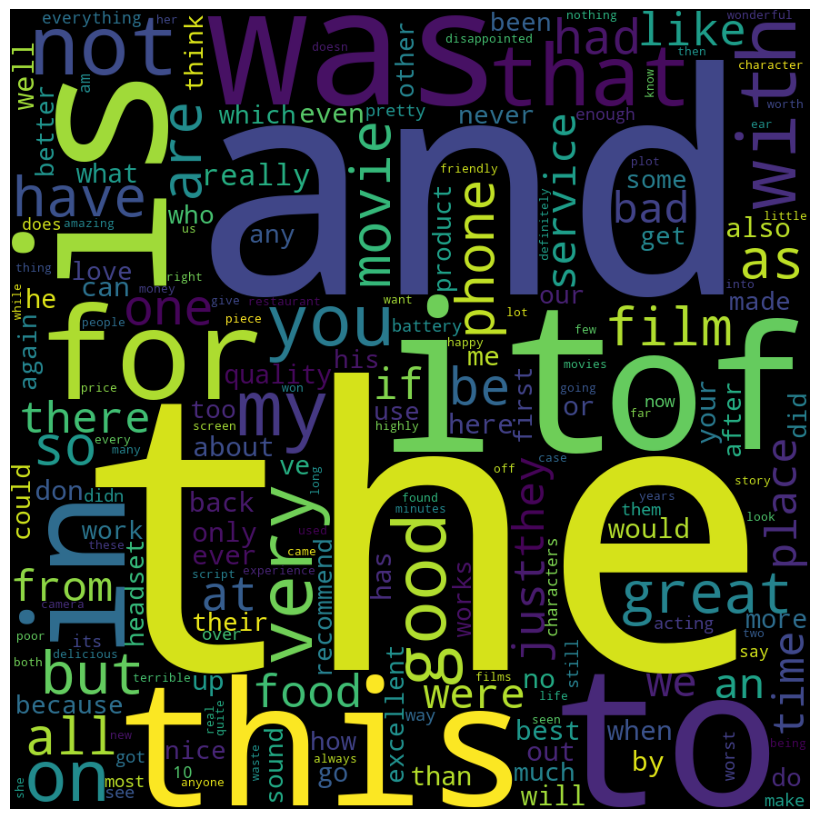

In [139]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Create CountVectorizer
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df['sentence'])

# Get Get word list and corresponding frequency
terms = count_vect.get_feature_names_out()
term_frequencies = df_counts.sum(axis=0).A1

# Create a dictionary that associates words with frequencies
word_freq_dict = dict(zip(terms, term_frequencies))

# Create WordCloud object
wordcloud = WordCloud(width=880, height=880).generate_from_frequencies(word_freq_dict)

# Show generated image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


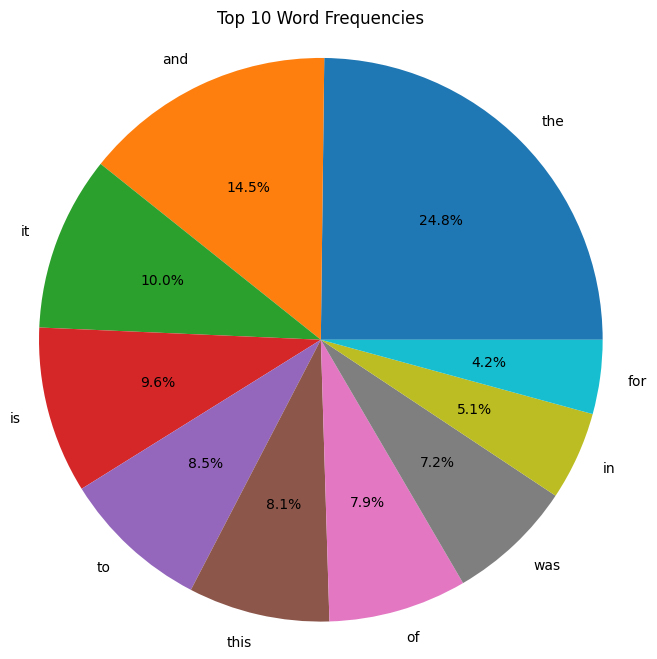

In [141]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df['sentence'])

# Get Get word list and corresponding frequency
terms = count_vect.get_feature_names_out()
term_frequencies = df_counts.sum(axis=0).A1

# Create a DataFrame to facilitate drawing a pie chart
data = pd.DataFrame({'Terms': terms, 'Frequencies': term_frequencies})

# Select the top N most frequent words, here select the top 10
top_n = data.nlargest(10, 'Frequencies')

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_n['Frequencies'], labels=top_n['Terms'], autopct='%1.1f%%')
plt.axis('equal')  # 使饼图为正圆
plt.title('Top 10 Word Frequencies')
plt.show()


- Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['sentence'])
print(X.shape)
print(vectorizer.get_feature_names_out())
print(X)

(2748, 5155)
['00' '10' '100' ... 'zillion' 'zombie' 'zombiez']
  (0, 1013)	0.39724820817666917
  (0, 647)	0.22555088175536459
  (0, 1982)	0.2306390246139404
  (0, 4793)	0.33030032253491776
  (0, 4835)	0.2733799006395169
  (0, 4531)	0.0881625510871022
  (0, 2158)	0.22094809666369034
  (0, 2314)	0.3010444787413116
  (0, 2432)	0.1210781906805114
  (0, 3387)	0.3068538434603926
  (0, 4609)	0.12778803811565193
  (0, 2809)	0.22839244785930268
  (0, 1829)	0.15591937844583587
  (0, 4987)	0.24797344916079914
  (0, 3043)	0.22352431764234307
  (0, 2427)	0.12236392895361783
  (0, 4545)	0.2102974927707943
  (0, 4161)	0.1865424331491731
  (1, 4861)	0.634632538811654
  (1, 1603)	0.4708610003994393
  (1, 713)	0.5119613502505376
  (1, 1993)	0.33678930332473467
  (2, 2449)	0.8223501692786147
  (2, 2023)	0.39972832078030696
  (2, 4531)	0.19930076345450964
  :	:
  (2747, 1387)	0.29231371393938493
  (2747, 5110)	0.29231371393938493
  (2747, 3437)	0.29231371393938493
  (2747, 3857)	0.2676820294037227
  (274

 - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).

### (1)TF_IDF

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Data splitting
train_X, test_X, train_y, test_y = train_test_split(df['sentence'], df['score'], test_size=0.25, random_state=4200)

# Using TF-IDF vectorization
tf_vectorizer = TfidfVectorizer()
X_train_tf = tf_vectorizer.fit_transform(train_X)
X_test_tf = tf_vectorizer.transform(test_X)

# Use Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf, train_y)

# Predict and calculate performance metrics
y_pred = naive_bayes_classifier.predict(X_test_tf)
accuracy = metrics.accuracy_score(test_y, y_pred)
print("Accuracy: %0.3f" % accuracy)

# Generate classification report
print(metrics.classification_report(test_y, y_pred, target_names=['Positive', 'Negative']))


Accuracy: 0.836
              precision    recall  f1-score   support

    Positive       0.83      0.85      0.84       376
    Negative       0.84      0.82      0.83       370

    accuracy                           0.84       746
   macro avg       0.84      0.84      0.84       746
weighted avg       0.84      0.84      0.84       746



### (2)Word frequency

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Split the data set into training set and test set
train_X, test_X, train_y, test_y = train_test_split(df['sentence'], df['score'], test_size=0.25, random_state=0)

# Use counting vectorizer
count_vectorizer = CountVectorizer()

# Fit a vectorizer on the training set and perform text vectorization
X_train_count = count_vectorizer.fit_transform(train_X)

print("n_samples: %d, n_features: %d" % X_train_count.shape)

# Text vectorization on test set
X_test_count = count_vectorizer.transform(test_X)
print("n_samples: %d, n_features: %d" % X_test_count.shape)

# Create a Naive Bayes classifier and fit it to the training data
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_count, train_y)

#  Predict test data and calculate accuracy
y_pred = naive_bayes_classifier.predict(X_test_count)
accuracy = metrics.accuracy_score(test_y, y_pred)
print("Accuracy: %0.3f" % accuracy)

# Print classification report
class_report = metrics.classification_report(test_y, y_pred, target_names=['Positive', 'Negative'])
print(class_report)


n_samples: 2237, n_features: 4328
n_samples: 746, n_features: 4328
Accuracy: 0.822
              precision    recall  f1-score   support

    Positive       0.83      0.81      0.82       378
    Negative       0.81      0.83      0.82       368

    accuracy                           0.82       746
   macro avg       0.82      0.82      0.82       746
weighted avg       0.82      0.82      0.82       746



## 4. Fourth

In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

Ans : The use of word clouds and bar charts, in my opinion, is a highly effective and intuitive approach. It allows users to quickly grasp the most frequently occurring word frequencies, making it very convenient and easy to understand. However, visualizing Bag of Words (BoW) or TF-IDF using document matrices is more challenging. Finding patterns in such large sparse matrices can be quite challenging.